In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.preprocessing import StandardScaler, RobustScaler,  PowerTransformer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

# Goal
- For this challenge, you are given (simulated) manufacturing control data that can be clustered into different control states. Your task is to cluster the data into these control states. You are not given any training data, and you are not told how many possible control states there are. This is a completely unsupervised problem, one you might encounter in a real-world setting. Good luck!

# Evaluation Metric
- The **Rand index** or Rand measure (named after William M. Rand) in statistics, and in particular in data clustering, is a measure of the similarity between two data clusterings. 

In [2]:
data = pd.read_csv('../input/tabular-playground-series-jul-2022/data.csv')
print(data.shape)
data

(98000, 30)


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,5,13,6,6,-0.469819,0.358126,1.068105,-0.559650,-0.366905,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,4,6,16,9,0.591035,-0.396915,0.145834,-0.030798,0.471167,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,8,9,3,11,-0.679875,0.469326,0.349843,-0.288042,0.291470,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,8,9,6,4,-0.389456,0.626762,-1.074543,-1.521753,-1.150806,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,3,1,13,11,-0.120743,-0.615578,-1.064359,0.444142,0.428327,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,8,5,7,6,7,0.362517,1.010965,-1.001519,0.409882,-0.504114,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,2,5,3,11,12,0.683558,-1.238120,0.863433,1.318554,-1.125758,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,10,7,5,4,3,-1.337303,0.064310,0.612507,0.398968,-0.409608,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,11,11,3,9,5,-0.612314,-0.416691,-0.750458,0.165038,0.333685,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


In [3]:
sub = pd.read_csv("../input/tabular-playground-series-jul-2022/sample_submission.csv")

In [4]:
def eda(df):
    summary = pd.DataFrame()
    summary['dtype'] = df.dtypes
    summary['missing'] = df.isnull().sum()
    summary['nlevel'] = df.nunique()
    return summary

eda(data)

,dtype,missing,nlevel
id,int64,0,98000
f_00,float64,0,98000
f_01,float64,0,98000
f_02,float64,0,98000
f_03,float64,0,98000
f_04,float64,0,98000
f_05,float64,0,98000
f_06,float64,0,98000
f_07,int64,0,32
f_08,int64,0,29


In [5]:
data.f_07.value_counts()

4     10797
3     10728
5     10337
2      9861
6      9239
7      8197
1      7574
8      6743
9      5428
0      4717
10     4275
11     3182
12     2252
13     1633
14     1143
15      706
16      440
17      273
18      198
19      108
20       70
21       35
22       31
23       10
25        7
24        7
26        2
29        2
27        2
30        1
28        1
32        1
Name: f_07, dtype: int64

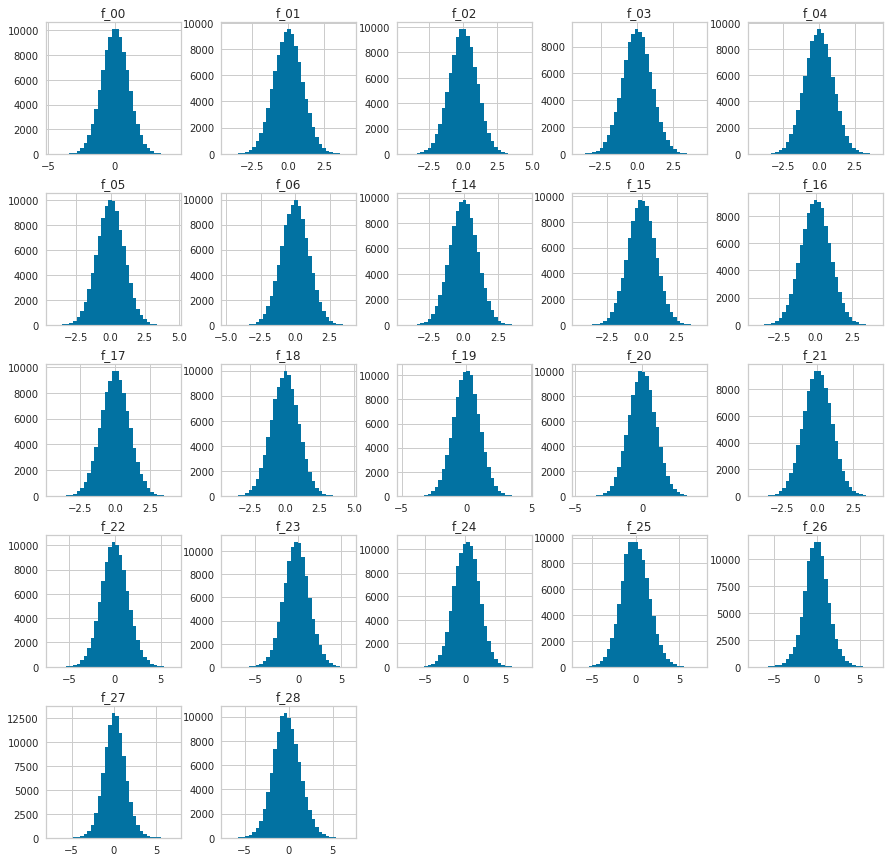

In [6]:
data.select_dtypes(include = 'float64').hist(bins = 35,figsize = (15,15))
plt.show()

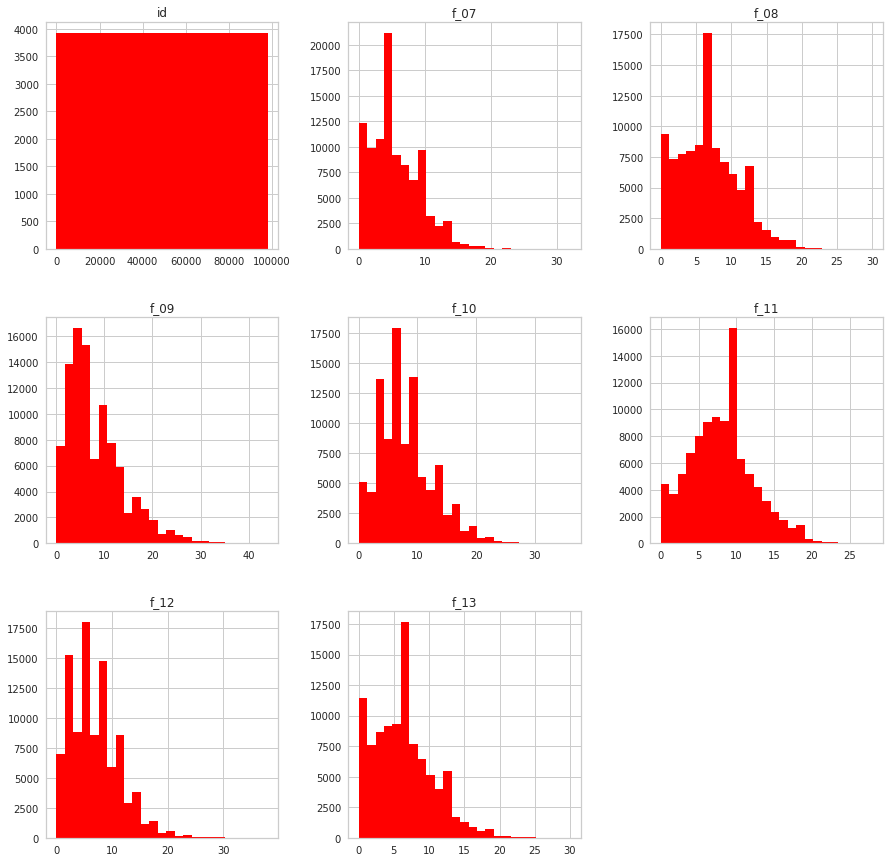

In [7]:
data.select_dtypes(include = 'int64').hist(bins = 25,figsize = (15,15), color = 'red')
plt.show()

# PCA

In [8]:
data = data.drop(columns = "id")

sc = StandardScaler()
sc = RobustScaler()
sc = PowerTransformer()
X_scaled = sc.fit_transform(data)

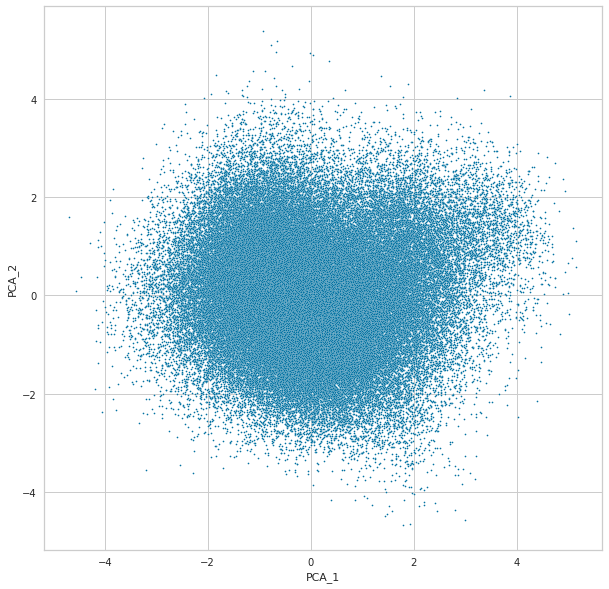

In [9]:
pca = PCA(random_state = 2022)
X_pca = pca.fit_transform(X_scaled)

PCA_df = pd.DataFrame({"PCA_1" : X_pca[:,0], "PCA_2" : X_pca[:,1]})
    
plt.figure(figsize=(10, 10))
sns.scatterplot(data = PCA_df, x = "PCA_1", y = "PCA_2", s=3);

# KMeans

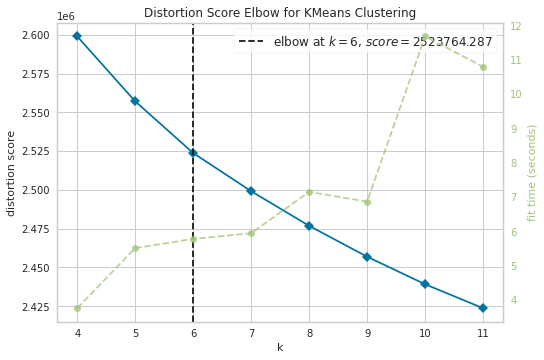

CPU times: user 3min 25s, sys: 22.5 s, total: 3min 47s
Wall time: 58.3 s


<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
%%time

# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
km = KMeans(random_state = 2022)
# k is range of number of clusters.
visualizer = KElbowVisualizer(km, k=(4,12), timings=True)
visualizer.fit(X_scaled)
visualizer.show()

# GMM

In [11]:
def components_number(max_n):
    bic_scores = []
    for n in range(1,max_n):
        gmm = GaussianMixture(n_components=n, covariance_type = 'full', n_init=3, random_state=3)
        gmm.fit(X_scaled)
        bic_score = gmm.bic(X_scaled)
        bic_scores.append(bic_score)
    return bic_scores

In [12]:
def components_number_type(max_n):
    bic_scores_cov = []
    for covariance in ["spherical", "tied", "diag","full"]:
        bic_scores = []
        for n in range(1,max_n):
            gmm = GaussianMixture(n_components=n, covariance_type = covariance, n_init=3, random_state=2)
            gmm.fit(X_scaled)
            bic_score = gmm.bic(X_scaled)
            bic_scores.append(bic_score)
        bic_scores_cov.append(bic_scores)
    return bic_scores_cov
    

In [13]:
%%time

gmm = BayesianGaussianMixture(n_components=7, covariance_type = 'full',n_init=10, random_state=2022)
preds = gmm.fit_predict(X_scaled)

CPU times: user 16min 3s, sys: 14min 2s, total: 30min 6s
Wall time: 7min 38s


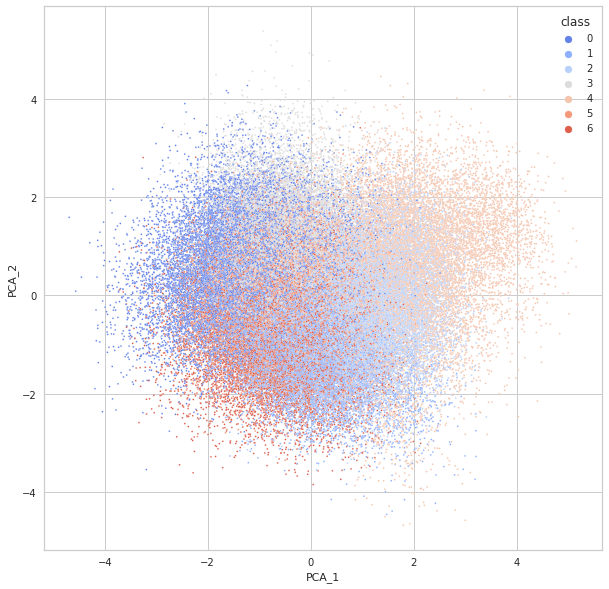

In [14]:
PCA_df["class"] = preds
    
f,ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data = PCA_df, x = "PCA_1", y = "PCA_2", hue="class", s=3, palette=sns.color_palette("coolwarm", PCA_df["class"].nunique()));

In [15]:
sub["Predicted"] = preds
sub

,Id,Predicted
0,0,6
1,1,5
2,2,6
3,3,4
4,4,1
...,...,...
97995,97995,5
97996,97996,0
97997,97997,2
97998,97998,3


In [16]:
sub.Predicted.value_counts()

1    16829
2    16157
0    16038
6    13653
4    13000
3    11229
5    11094
Name: Predicted, dtype: int64

In [17]:
sub.to_csv('gmm.csv', index = False)